# Exercise 2-2: Write your own code for the Mortality Notebook

In [9]:
import pandas as pd

## Get the long and wide DataFrames

In [79]:
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [81]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,1983.8,466.1,298.3,484.8
1,1901,1695.0,427.6,273.6,454.4
2,1902,1655.7,403.3,252.5,421.5
3,1903,1542.1,414.7,268.2,434.1
4,1904,1591.5,425.0,305.2,471.4


## Work With the long DataFrame

In [83]:
mortality_data.head(5)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [85]:
mortality_data = mortality_data.rename(columns={ 'DeathRate':'Deaths/100K'})

In [87]:
mortality_data[['Year', 'MeanCentered']].head(5)

,Year,MeanCentered
0,1900,1790.87584
1,1901,1502.07584
2,1902,1462.77584
3,1903,1349.17584
4,1904,1398.57584


In [89]:
mortality_data_filtered = mortality_data[(mortality_data['Year'] >= 1915) & (mortality_data['Year'] <= 1920)]
mortality_data_filtered.tail(6)

,Year,AgeGroup,Deaths/100K,MeanCentered
372,1915,15-19 Years,330.9,137.97584
373,1916,15-19 Years,355.8,162.87584
374,1917,15-19 Years,380.3,187.37584
375,1918,15-19 Years,777.4,584.47584
376,1919,15-19 Years,438.5,245.57584
377,1920,15-19 Years,402.9,209.97584


In [91]:
ageGroup_filtered = mortality_data.query('AgeGroup == "01-04 Years"')
ageGroup_filtered[['Year', 'Deaths/100K']]

,Year,Deaths/100K
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


In [127]:
sorted_data = mortality_data.sort_values('Deaths/100K', ascending=False)
sorted_data.head()

# print(sorted_data.head(3))
# print(sorted_data.tail(3))
combine_data = pd.concat([sorted_data.head(3), sorted_data.tail(3)])
combine_data

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
233,2014,05-09 Years,11.5,-181.42416
229,2010,05-09 Years,11.5,-181.42416
231,2012,05-09 Years,11.4,-181.52416


In [130]:
median_value = mortality_data['Deaths/100K'].median()
print(median_value)

89.5


In [139]:
groupby_sum_value = mortality_data.groupby('Year')['Deaths/100K'].sum()
groupby_sum_value

Year
1900    3233.0
1901    2850.6
1902    2733.0
1903    2659.1
1904    2793.1
         ...  
2014      95.0
2015      99.5
2016     103.3
2017     102.9
2018      99.6
Name: Deaths/100K, Length: 119, dtype: float64

## Work with the wide DataFrame

In [141]:
mortality_wide.head(5)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,1983.8,466.1,298.3,484.8
1,1901,1695.0,427.6,273.6,454.4
2,1902,1655.7,403.3,252.5,421.5
3,1903,1542.1,414.7,268.2,434.1
4,1904,1591.5,425.0,305.2,471.4


In [144]:
print("Index:  ", mortality_wide.index)

Index:   RangeIndex(start=0, stop=119, step=1)


In [154]:
statistics_without_T = mortality_wide.describe()
statistics_without_T

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
count,119.000000,119.000000,119.000000,119.000000,119.00000
mean,1959.000000,383.226050,117.326050,93.769748,177.37479
std,34.496377,500.454211,127.474958,88.404363,138.36229
min,1900.000000,24.000000,11.400000,13.900000,44.80000
25%,1929.500000,50.650000,24.000000,27.200000,85.45000
50%,1959.000000,109.100000,48.400000,44.600000,106.90000
75%,1988.500000,577.300000,198.900000,158.900000,283.65000
max,2018.000000,1983.800000,466.100000,375.100000,777.40000


In [160]:
statistics_with_T = mortality_wide.describe().T
statistics_with_T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.000000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
01-04 Years,119.0,383.226050,500.454211,24.0,50.65,109.1,577.30,1983.8
05-09 Years,119.0,117.326050,127.474958,11.4,24.00,48.4,198.90,466.1
10-14 Years,119.0,93.769748,88.404363,13.9,27.20,44.6,158.90,375.1
15-19 Years,119.0,177.374790,138.362290,44.8,85.45,106.9,283.65,777.4


In [162]:
year_ageGroup = mortality_wide[['Year', '01-04 Years']]
year_ageGroup

,Year,01-04 Years
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


In [167]:
ageGroup_filtered = mortality_wide.query('Year >= 1915 and Year >= 1920')
ageGroup_filtered

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
20,1920,987.2,295.2,229.9,402.9
21,1921,801.2,281.4,209.9,326.5
22,1922,742.0,239.6,186.6,319.6
23,1923,806.7,240.0,188.2,325.8
24,1924,683.2,221.7,179.8,313.5
...,...,...,...,...,...
114,2014,24.0,11.5,14.0,45.5
115,2015,24.9,11.7,14.6,48.3
116,2016,25.3,12.2,14.6,51.2
117,2017,24.3,11.6,15.5,51.5


In [173]:
combine_data = mortality_wide.query('Year >= 1915 and Year >= 1920')[['Year', '01-04 Years']]
#combine_data = combine_data[['Year', '01-04 Years']]
combine_data

,Year,01-04 Years
20,1920,987.2
21,1921,801.2
22,1922,742.0
23,1923,806.7
24,1924,683.2
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


In [186]:
mortality_wide.groupby('Year').agg(['mean','median','sum'])

01-04 Years                 05-09 Years               10-14 Years         \
            mean  median     sum        mean median    sum        mean median   
Year                                                                            
1900      1983.8  1983.8  1983.8       466.1  466.1  466.1       298.3  298.3   
1901      1695.0  1695.0  1695.0       427.6  427.6  427.6       273.6  273.6   
1902      1655.7  1655.7  1655.7       403.3  403.3  403.3       252.5  252.5   
1903      1542.1  1542.1  1542.1       414.7  414.7  414.7       268.2  268.2   
1904      1591.5  1591.5  1591.5       425.0  425.0  425.0       305.2  305.2   
...          ...     ...     ...         ...    ...    ...         ...    ...   
2014        24.0    24.0    24.0        11.5   11.5   11.5        14.0   14.0   
2015        24.9    24.9    24.9        11.7   11.7   11.7        14.6   14.6   
2016        25.3    25.3    25.3        12.2   12.2   12.2        14.6   14.6   
2017        24.3    24.3    24.3        11.6   11.6   11.6        15.5   15.5   
2018        24.0    24.0    24.0        11.5   11.5   11.5        14.9   14.9   

            15-19 Years                
        sum        mean median    sum  
Year                                   
1900  298.3       484.8  484.8  484.8  
1901  273.6       454.4  454.4  454.4  
1902  252.5       421.5  421.5  421.5  
1903  268.2       434.1  434.1  434.1  
1904  305.2       471.4  471.4  471.4  
...     ...         ...    ...    ...  
2014   14.0        45.5   45.5   45.5  
2015   14.6        48.3   48.3   48.3  
2016   14.6        51.2   51.2   51.2  
2017   15.5        51.5   51.5   51.5  
2018   14.9        49.2   49.2   49.2  

[119 rows x 12 columns]

In [190]:
mortality_wide['TotalDeaths'] = mortality_wide.iloc[:, 1:].sum(axis=1)
mortality_wide

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years,TotalDeaths
0,1900,1983.8,466.1,298.3,484.8,3233.0
1,1901,1695.0,427.6,273.6,454.4,2850.6
2,1902,1655.7,403.3,252.5,421.5,2733.0
3,1903,1542.1,414.7,268.2,434.1,2659.1
4,1904,1591.5,425.0,305.2,471.4,2793.1
...,...,...,...,...,...,...
114,2014,24.0,11.5,14.0,45.5,95.0
115,2015,24.9,11.7,14.6,48.3,99.5
116,2016,25.3,12.2,14.6,51.2,103.3
117,2017,24.3,11.6,15.5,51.5,102.9


<Axes: xlabel='Year'>

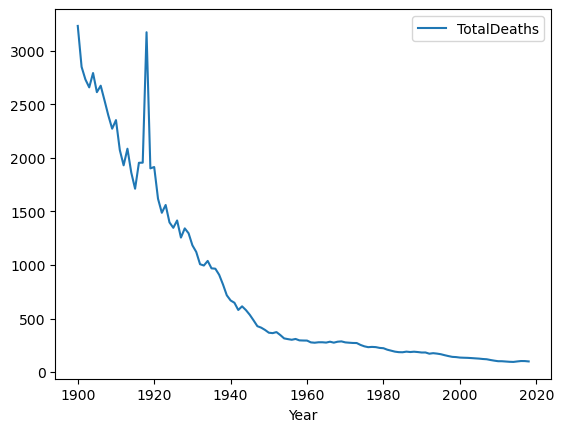

In [206]:
#mortality_wide.pivot(index='Year', columns='Year')['TotalDeaths'].plot()
mortality_wide.plot.line(x='Year',y=['TotalDeaths'])